# Libraries

In [1]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Version

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Dataset

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

In [4]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

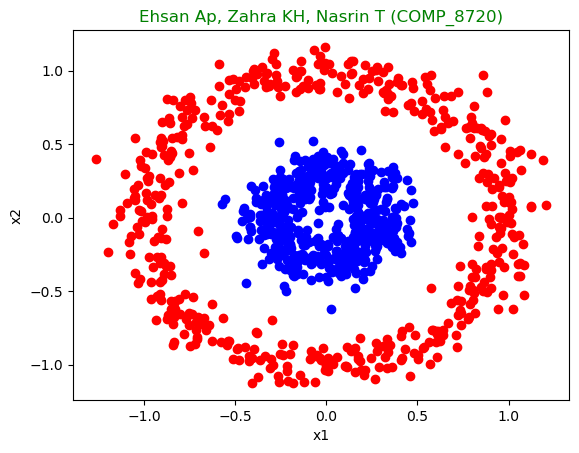

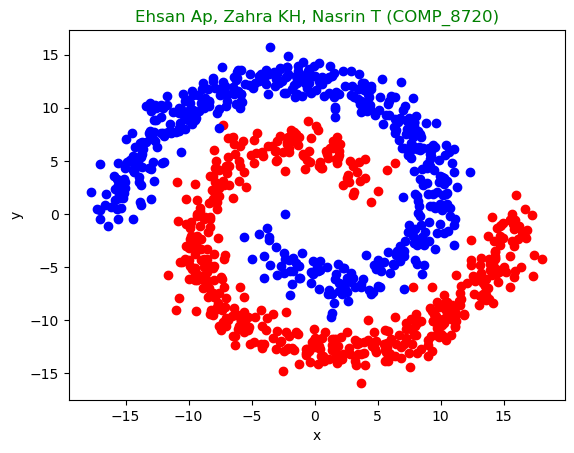

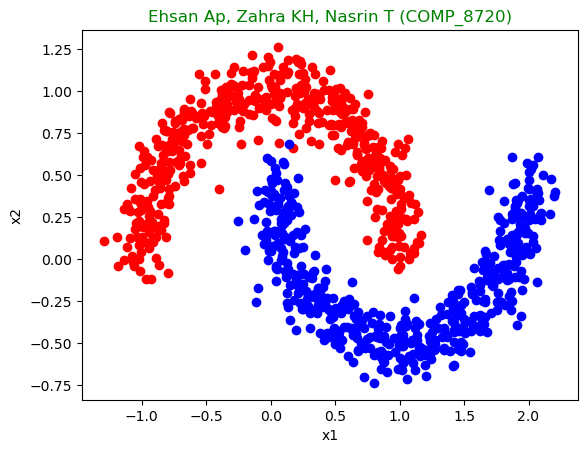

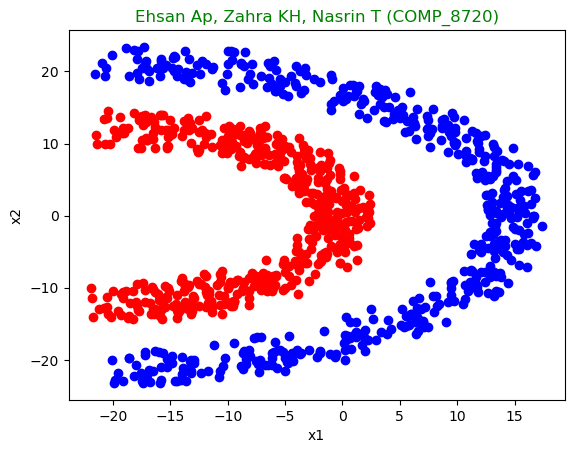

In [5]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [6]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))

def calculate_wcss(X, y):
    wcss = 0
    for k in np.unique(y):
        mask = y == k
        centroid = np.mean(X[mask], axis=0)
        distance = np.sum((X[mask] - centroid) ** 2)
        wcss += distance
    return wcss

def calculate_i_index(X, y):
    wcss = calculate_wcss(X, y)
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(y))
    s = 1 - silhouette_score(X, y)
    if n_clusters > 1:
        return s * np.sqrt(wcss / (n_samples * (n_clusters - 1)))
    else:
        return np.nan

# Circle

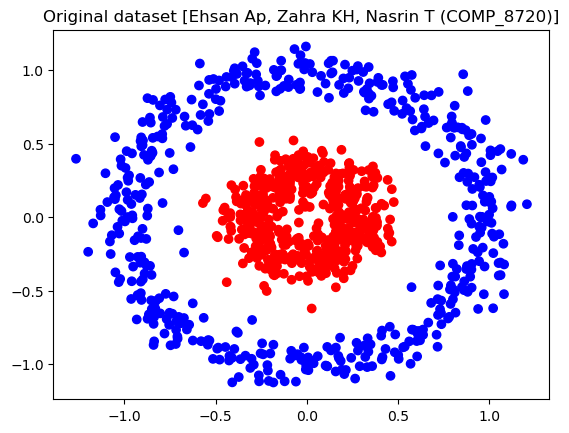

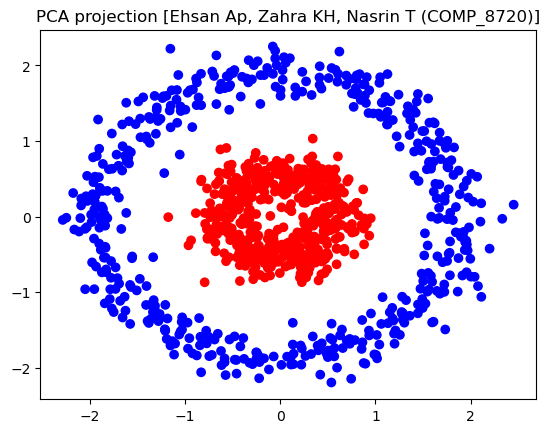

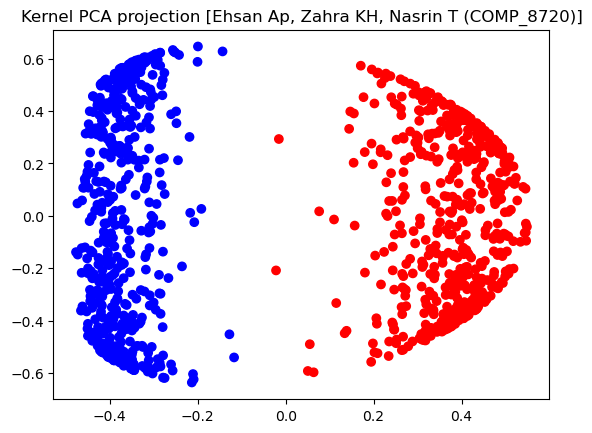

In [7]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

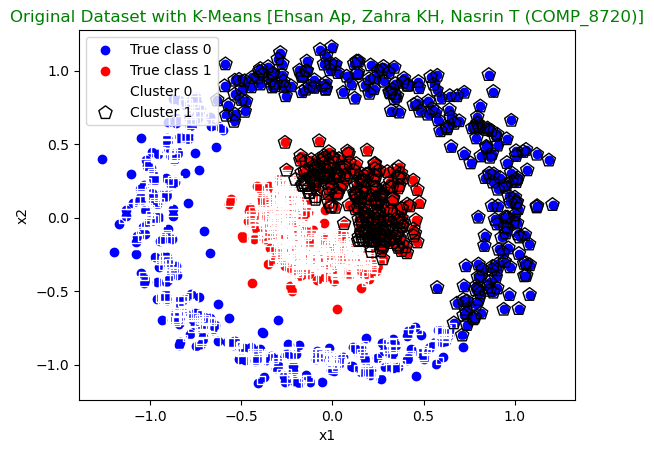

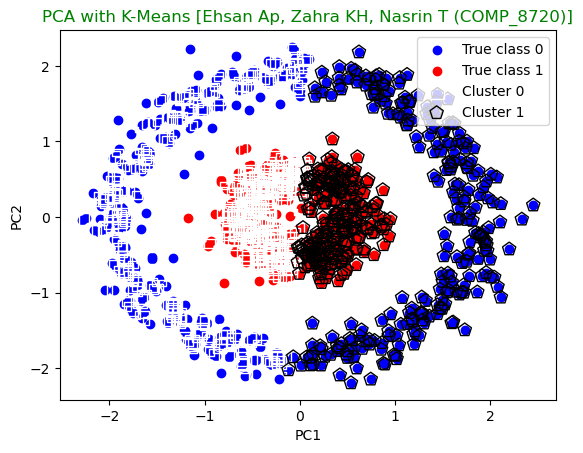

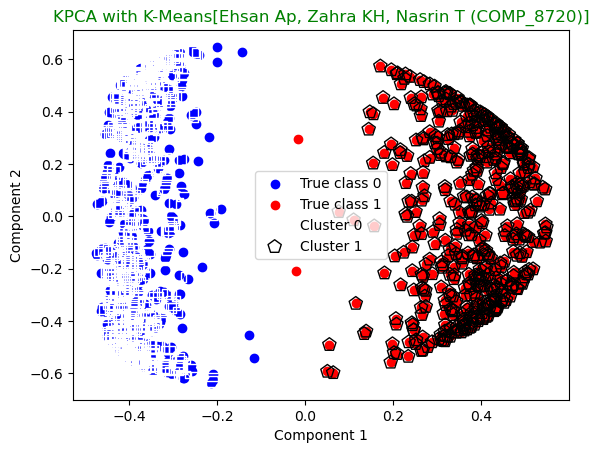

In [8]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [9]:
data = circle_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.309682     0.885971
1    Calinski-Harabasz  461.343708  1033.502329
2           Silhouette    0.290228     0.514921
3  Adjusted Rand Index   -0.001002     0.992008
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.830081     0.176207


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Moons

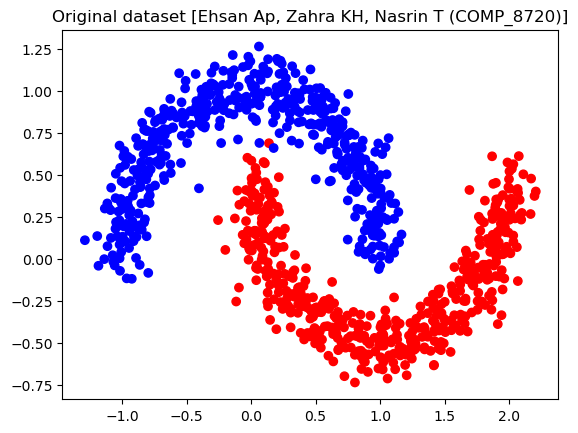

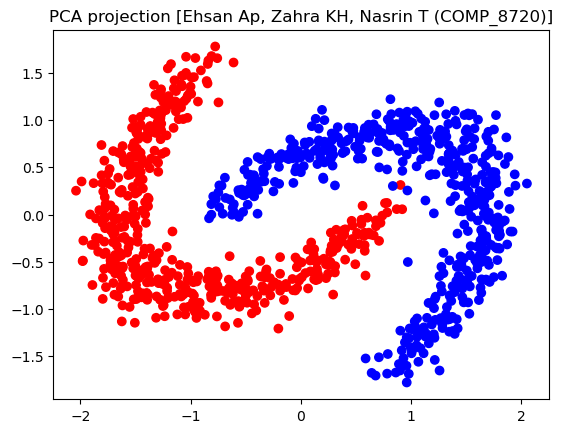

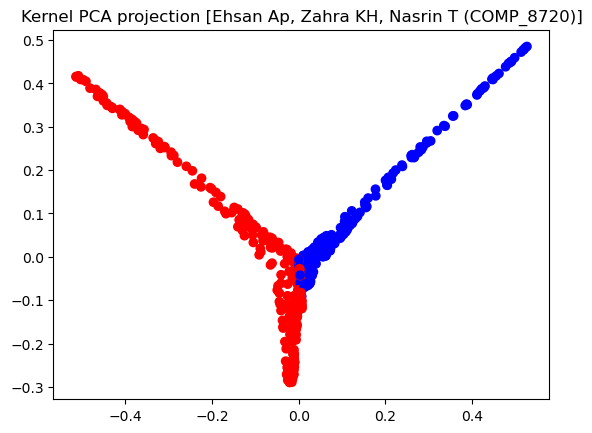

In [10]:
moons_csv = moons_csv

X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=40)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

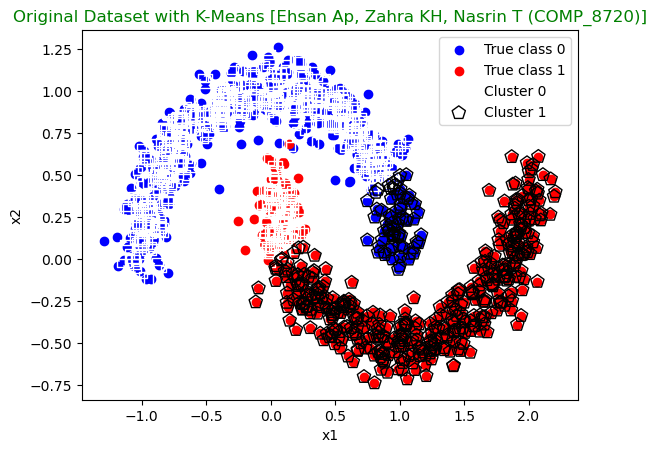

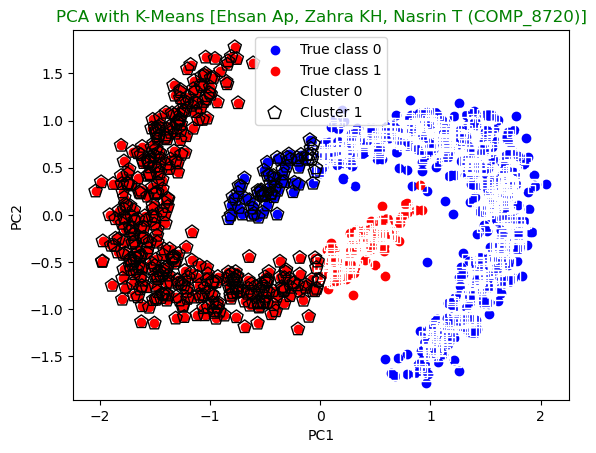

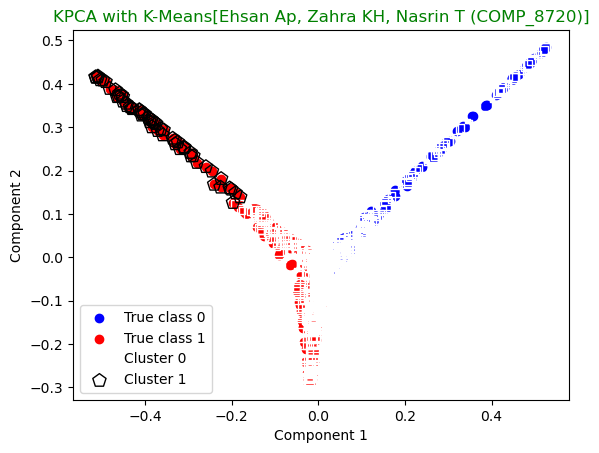

In [11]:
moons_csv = moons_csv

X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [12]:
data = moons_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric          PCA  Kernel PCA
0       Davies-Bouldin     0.816856    0.362532
1    Calinski-Harabasz  1346.593923  714.992649
2           Silhouette     0.488802    0.765526
3  Adjusted Rand Index     0.486690    0.014177
4       Xie-Beni Index     0.001000    0.001000
5              Index I     0.471668    0.033358


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Spiral

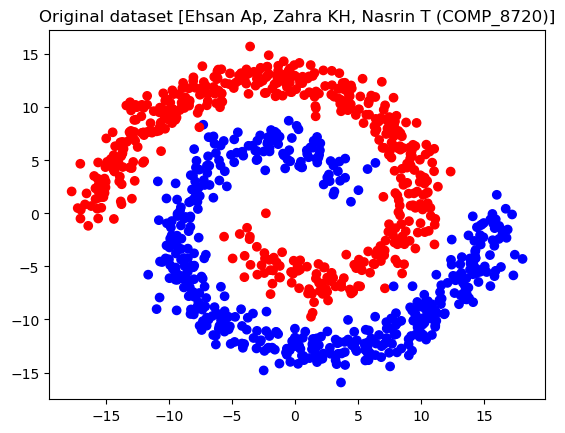

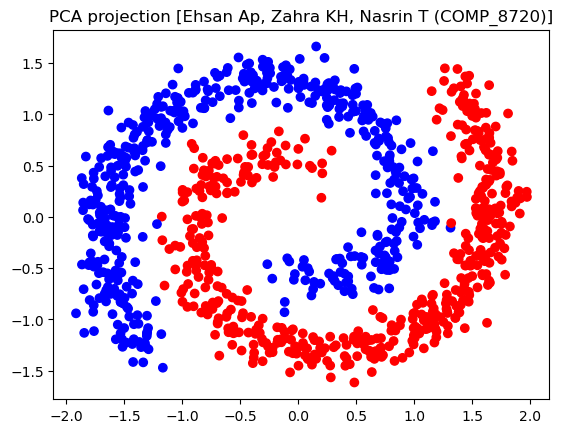

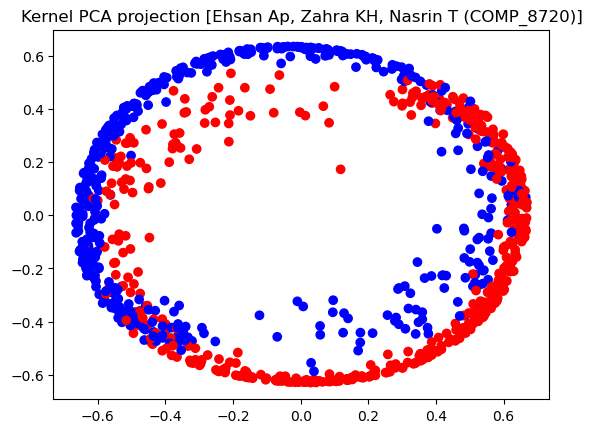

In [13]:
spiral_csv = spiral_csv

X = spiral_csv[['x', 'y']]
y = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

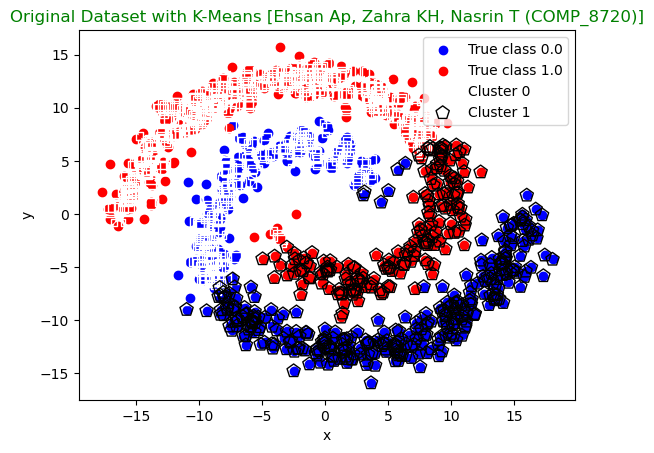

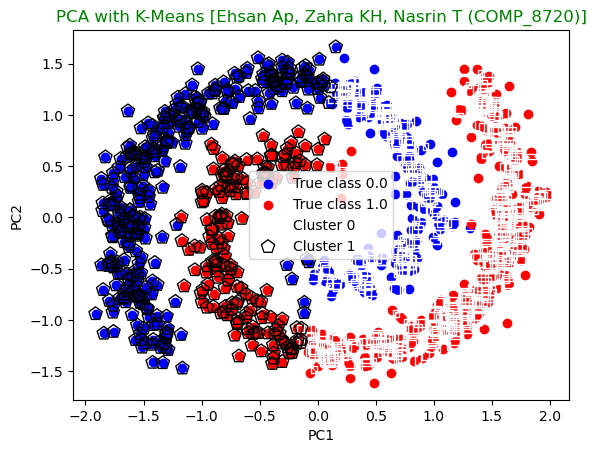

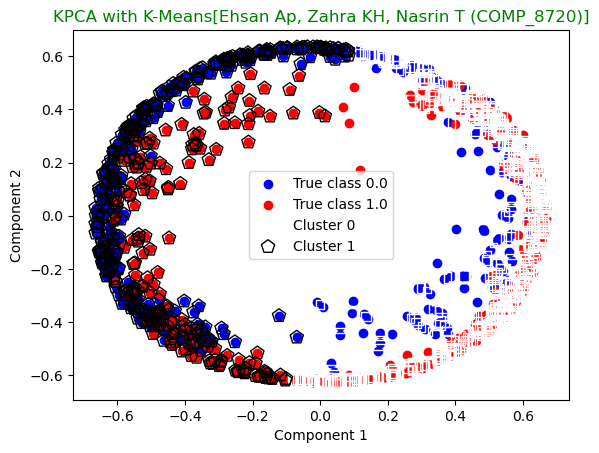

In [14]:
spiral_csv = spiral_csv

X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [15]:
data = spiral_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    0.949054    0.963431
1    Calinski-Harabasz  956.888294  923.864099
2           Silhouette    0.436351    0.464943
3  Adjusted Rand Index    0.084347    0.149693
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.569545    0.236034


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Halfkernel

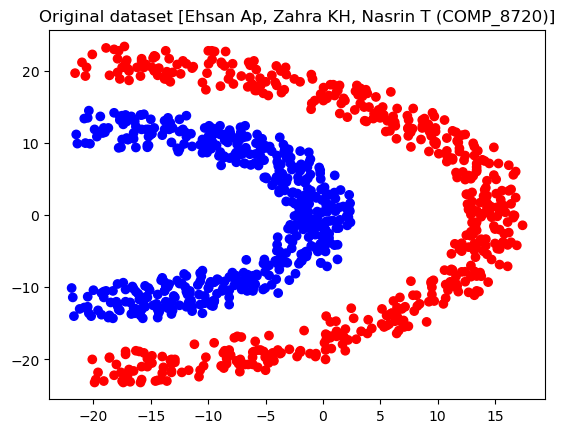

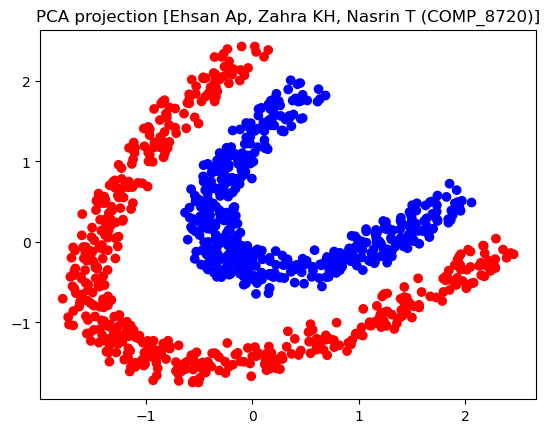

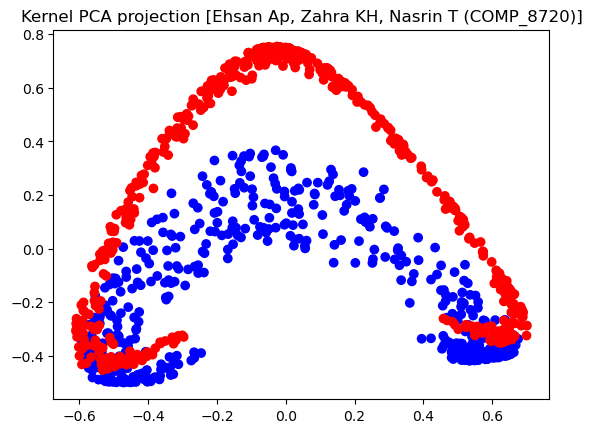

In [16]:
halfkernel_csv = halfkernel_csv

X = halfkernel_csv[['x1', 'x2']]
y = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

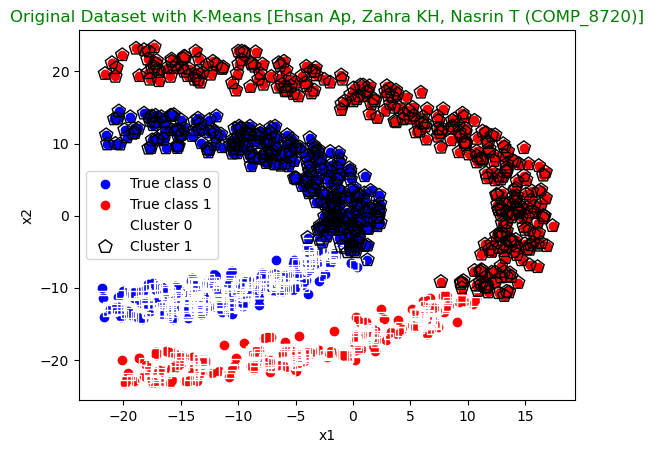

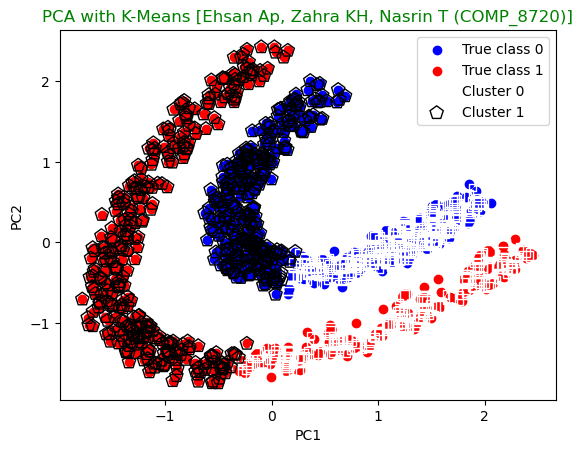

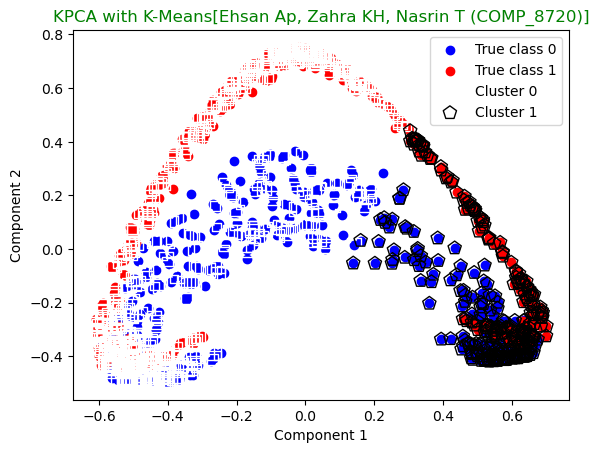

In [17]:
halfkernel_csv = halfkernel_csv

X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [18]:
data = halfkernel_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    1.024780    0.832573
1    Calinski-Harabasz  629.925850  828.010429
2           Silhouette    0.385213    0.475486
3  Adjusted Rand Index    0.000116    0.003203
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.680750    0.227332


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Applying On S_Shape

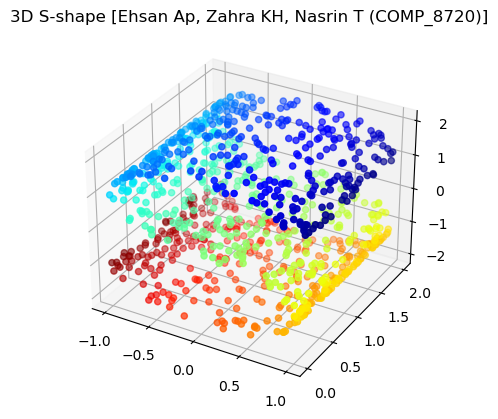

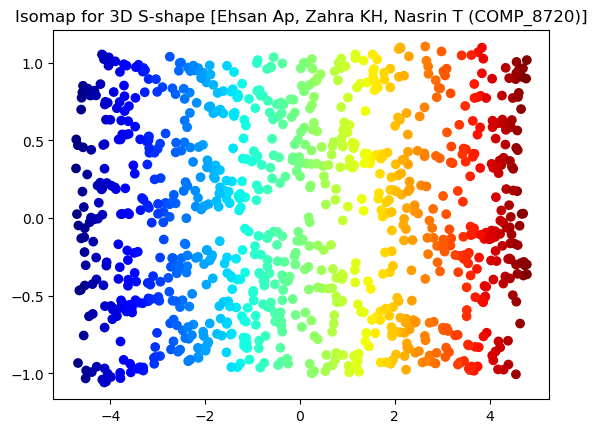

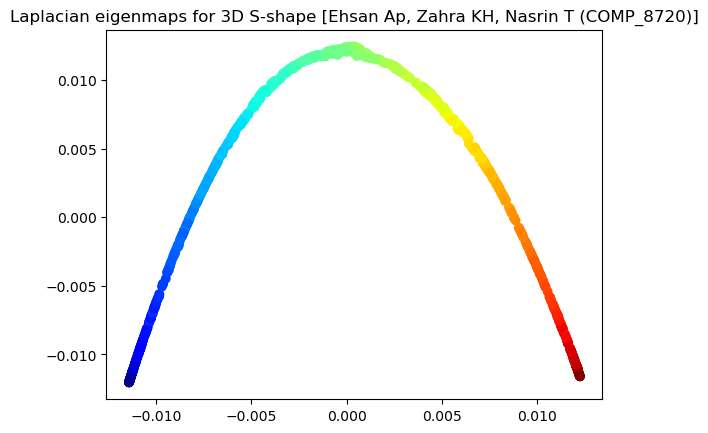

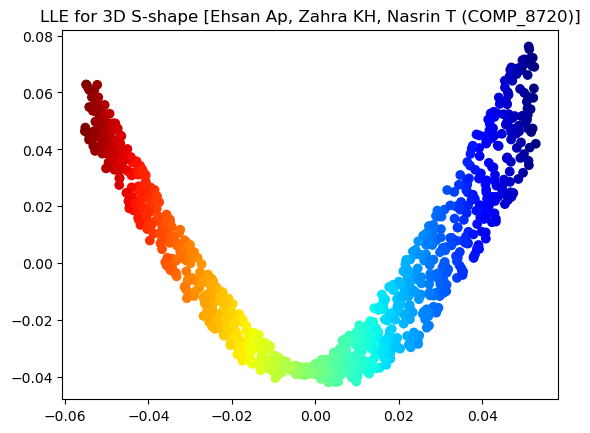

In [19]:
X_s_shape, y_s_shape = make_s_curve(n_samples=1000, random_state=0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_s_shape[:, 0], X_s_shape[:, 1], X_s_shape[:, 2], c=y_s_shape, cmap='jet')
ax.set_title('3D S-shape [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

n_neighbors = 15
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X_s_shape)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_s_shape, cmap='jet',)
plt.title('Isomap for 3D S-shape [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

laplacian = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_lap = laplacian.fit_transform(X_s_shape)
plt.scatter(X_lap[:, 0], X_lap[:, 1], c=y_s_shape, cmap='jet')
plt.title('Laplacian eigenmaps for 3D S-shape [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X_s_shape)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_s_shape, cmap='jet')
plt.title('LLE for 3D S-shape [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

In [20]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return mean_squared_error(X_original, X_reconstructed)

def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 5, 10, 20, 30, 40, 50]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_s_shape, y_s_shape, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   0.011633             0.003503  0.151255
5.0   0.002536             0.063845  0.120828
10.0  0.002599             0.087136  0.004070
20.0  0.002850             0.103227  0.046720
30.0  0.004320             0.112672  0.099353
40.0  0.006338             0.115317  0.110598
50.0  0.008548             0.117251  0.096604

Best K values for each method:
Isomap                  5.0
Laplacian Eigenmaps     3.0
LLE                    10.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_61116/3340738315.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   0.011633             0.002786  0.148162
5.0   0.002536             0.063848  0.298996
10.0  0.002599             0.087137  0.004070
20.0  0.002850             0.103227  0.046699
30.0  0.004320             0.112673  0.099426
40.0  0.006338             0.115317  0.110664

Best K values for each method:
Isomap                  5.0
Laplacian Eigenmaps     3.0
LLE                    10.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_61116/2793848151.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

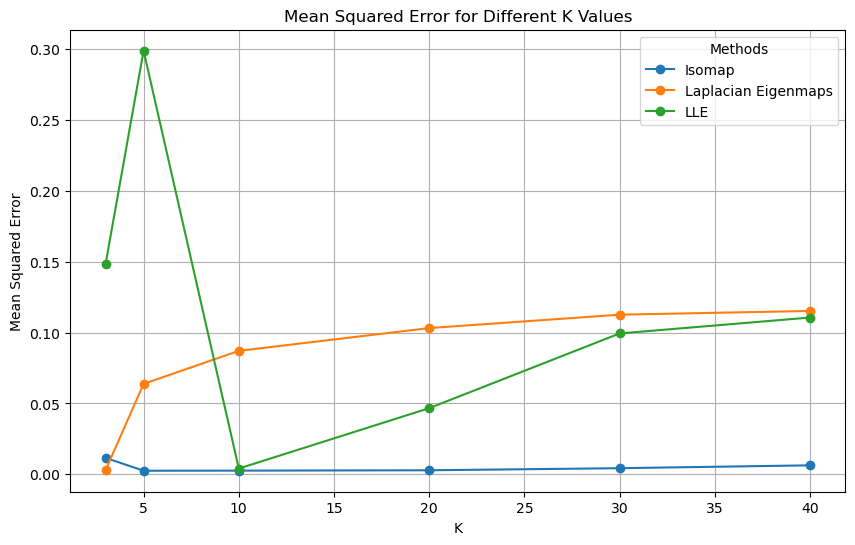

In [21]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return mean_squared_error(X_original, X_reconstructed)

def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors

n_components = 2
k_values = [3, 5, 10, 20, 30, 40]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_s_shape, y_s_shape, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Different K Values")
plt.legend(title="Methods")
plt.grid()
plt.show()

# Applying On Swiss_Role

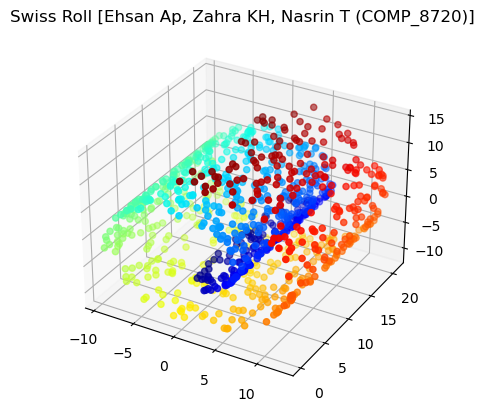

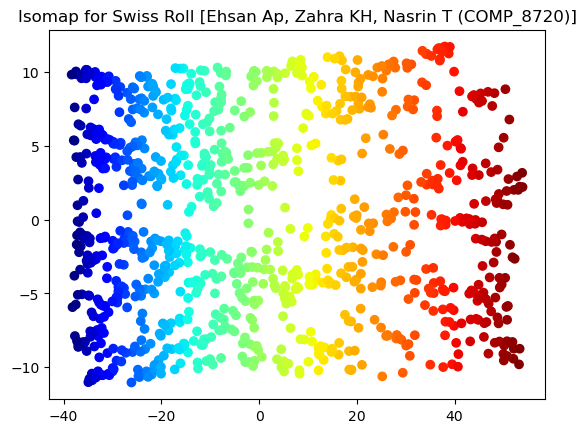

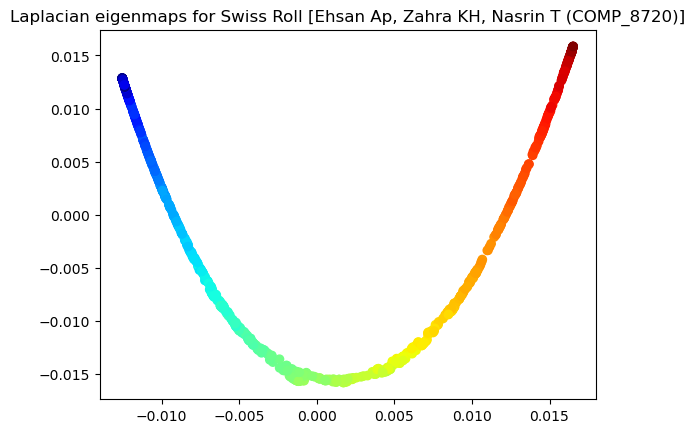

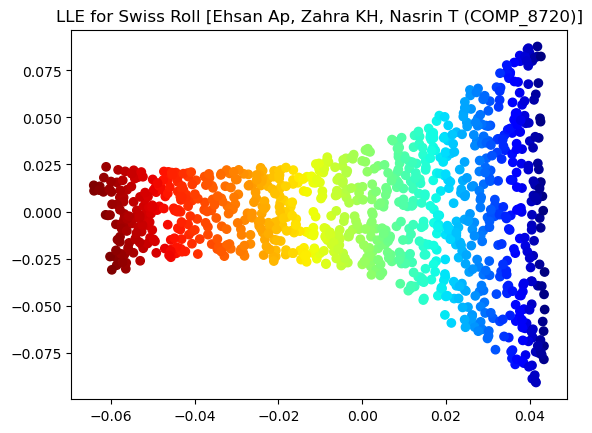

In [22]:
X_swiss_roll, y_swiss_roll = make_swiss_roll(n_samples=1000, random_state=0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=y_swiss_roll, cmap='jet')
ax.set_title('Swiss Roll [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

n_neighbors = 10
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X_swiss_roll)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('Isomap for Swiss Roll [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

laplacian = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_lap = laplacian.fit_transform(X_swiss_roll)
plt.scatter(X_lap[:, 0], X_lap[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('Laplacian eigenmaps for Swiss Roll [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X_swiss_roll)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_swiss_roll, cmap='jet')
plt.title('LLE for Swiss Roll [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

         Isomap  Laplacian Eigenmaps        LLE
K                                              
3.0    0.998484             0.293721   8.879338
5.0    0.247543             4.748055   5.366601
10.0   0.247670             9.662265   0.317050
20.0   1.983476             6.959960  16.604719
30.0  11.138645             5.523525   8.495832
40.0  11.696773            10.816445  12.628080

Best K values for each method:
Isomap                  5.0
Laplacian Eigenmaps     3.0
LLE                    10.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_61116/3537116424.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

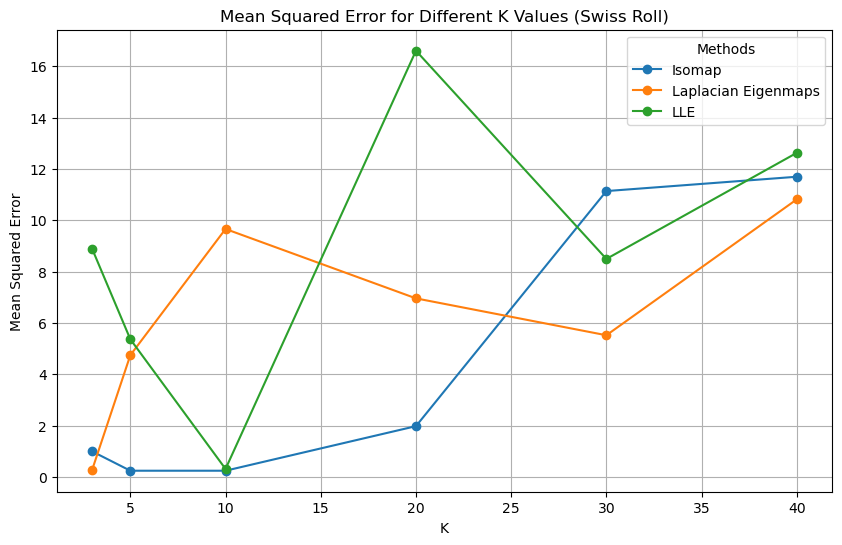

In [23]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return mean_squared_error(X_original, X_reconstructed)

def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 5, 10, 20, 30, 40]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_swiss_roll, y_swiss_roll, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Different K Values (Swiss Roll)")
plt.legend(title="Methods")
plt.grid()
plt.show()